In [81]:
print("hello world")

hello world


In [82]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6, 0))

In [84]:
import requests
import pandas as pd

In [85]:
def get_historic_price(symbol, after='2018-09-01'):
    
    url = 'https://api.kraken.com/0/public/OHLC'
    pair = f"{symbol.upper()}USD" # XBTUSD when symbol='xbt' for example
    
    resp = requests.get(url, params={
        "pair": pair,
        'interval': 60,
        'since': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    
    data = resp.json()
    
    results_key = [k for k in data['result'].keys() if k != 'last'][0]
    results = [
        (close_time, float(open), float(high), float(low), float(close), float(volume))
        for (close_time, open, high, low, close, vwap, volume, count)
        in data['result'][results_key]
    ]
    df = pd.DataFrame(results, columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [86]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2024-05-29 12:22:01.347437')

In [87]:
btc = get_historic_price('btc', after=last_week)

In [88]:
eth = get_historic_price('eth', after=last_week)

In [89]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,68473.380240,68632.088623,68322.579641,68490.895210,61.094422
std,1050.163849,1092.489767,1036.460474,1064.864228,75.825962
min,67155.000000,67256.800000,66652.400000,67155.000000,2.096314
25%,67675.950000,67748.400000,67618.000000,67675.900000,15.759467
50%,68116.300000,68280.000000,67951.900000,68144.000000,35.341279
75%,68995.050000,69165.500000,68849.800000,69003.550000,78.238786
max,71200.800000,71296.000000,71054.500000,71200.700000,468.703368


In [90]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2024-05-29 13:00:00,67849.8,68140.0,67545.3,67805.2,121.413190
2024-05-29 14:00:00,67805.3,67849.0,67468.7,67583.7,95.780549
2024-05-29 15:00:00,67583.6,67749.3,67265.5,67339.2,212.773072
2024-05-29 16:00:00,67332.9,67594.7,67100.0,67506.0,147.093406
2024-05-29 17:00:00,67506.0,67583.8,67282.2,67583.7,63.918369


In [91]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167 entries, 2024-05-29 13:00:00 to 2024-06-05 11:00:00
Data columns (total 5 columns):
OpenPrice     167 non-null float64
HighPrice     167 non-null float64
LowPrice      167 non-null float64
ClosePrice    167 non-null float64
Volume        167 non-null float64
dtypes: float64(5)
memory usage: 7.8 KB


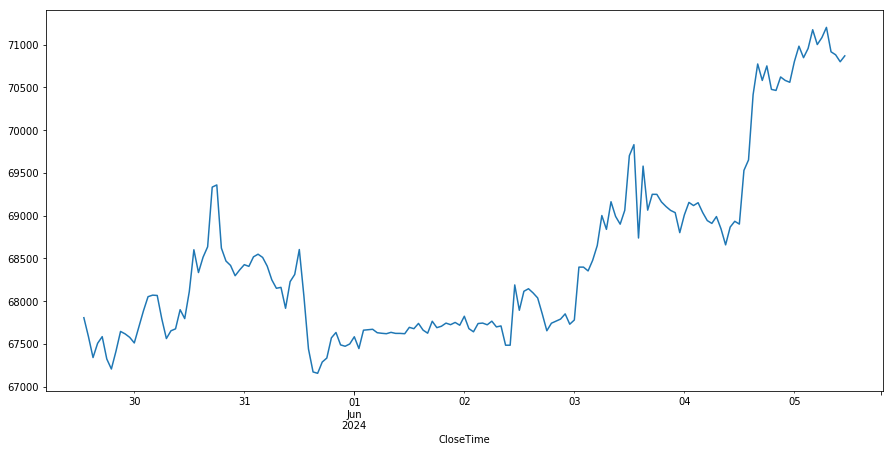

In [92]:
btc['ClosePrice'].plot(figsize=(15, 7))

In [93]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2024-05-29 13:00:00,3811.99,3834.34,3780.00,3793.96,1091.150330
2024-05-29 14:00:00,3793.97,3797.47,3760.25,3775.00,681.390188
2024-05-29 15:00:00,3775.00,3793.68,3750.00,3756.77,1160.040128
2024-05-29 16:00:00,3756.87,3766.03,3742.74,3763.01,373.726170
2024-05-29 17:00:00,3763.01,3773.80,3748.29,3762.37,517.555862


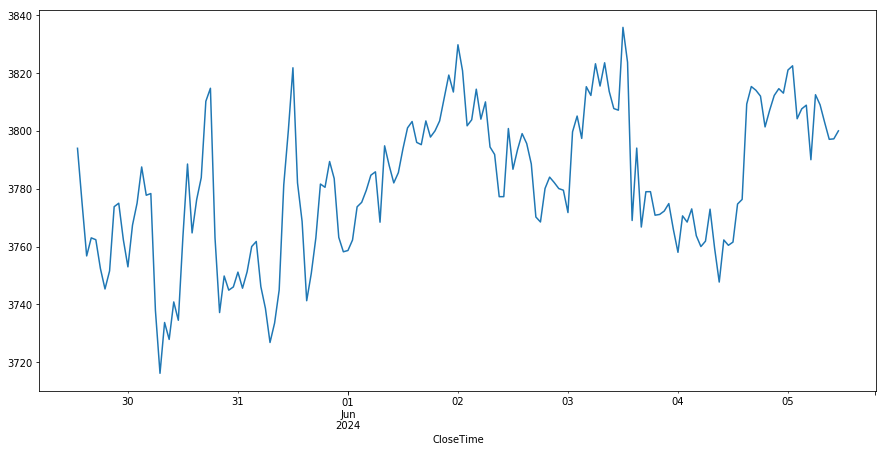

In [94]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [95]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [96]:
output_notebook()

Loading BokehJS ...

In [97]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

In [98]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [99]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [100]:
eth.to_excel(writer, sheet_name='Ether')

In [101]:
writer.save()

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [103]:
pd.isnull(np.nan)

True

In [104]:
pd.isnull(None)

True

In [105]:
pd.isna(np.nan)

True

In [106]:
pd.isna(None)

True

In [107]:
pd.notnull(None)

False

In [108]:
pd.notnull(np.nan)

False

In [109]:
pd.notna(np.nan)

False

In [110]:
pd.notnull(3)

True

In [111]:
pd.isnull(pd.Series([1, np.nan, 7]))

0    False
1     True
2    False
dtype: bool

In [112]:
pd.notnull(pd.Series([1, np.nan, 7]))

0     True
1    False
2     True
dtype: bool

In [113]:
pd.isnull(pd.DataFrame({
    'Column A': [1, np.nan, 7],
    'Column B': [np.nan, 2, 3],
    'Column C': [np.nan, 2, np.nan]
}))

,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True


In [114]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])

In [115]:
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [116]:
pd.isnull(s)

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [117]:
pd.notnull(s).sum()

4

In [118]:
pd.isnull(s).sum()

2

In [119]:
x = np.arange(-10, 11)

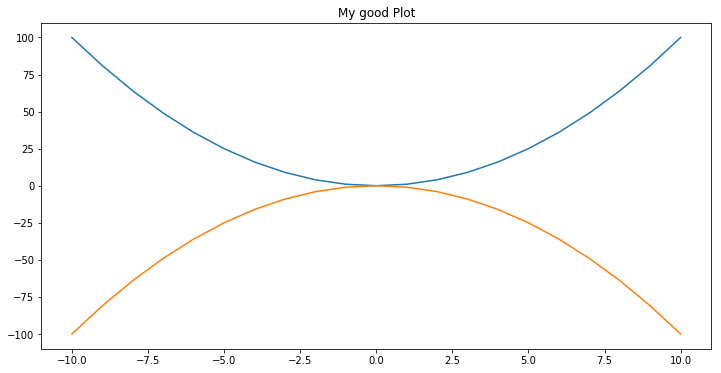

In [120]:
plt.figure(figsize=(12, 6))

plt.title('My good Plot')

plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

Text(0,0.5,'X Squared')

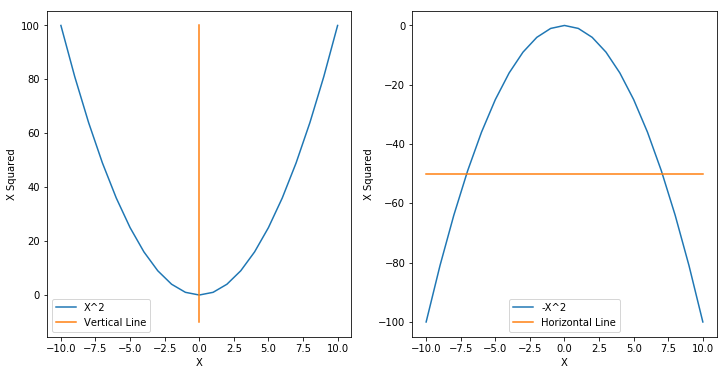

In [121]:
plt.figure(figsize=(12, 6))
plt.title('My Nice Plot')

plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1, 2, 2)
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

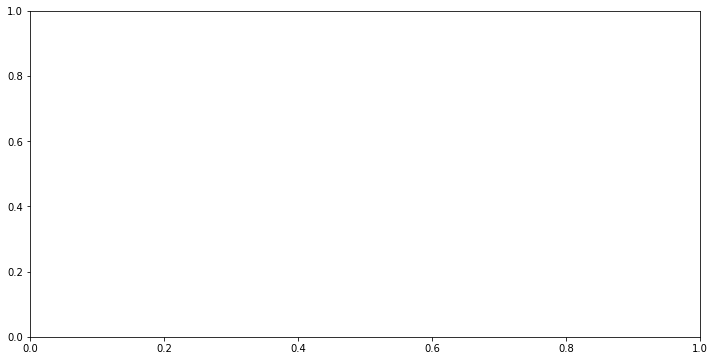

In [122]:
fig, axes = plt.subplots(figsize=(12, 6))

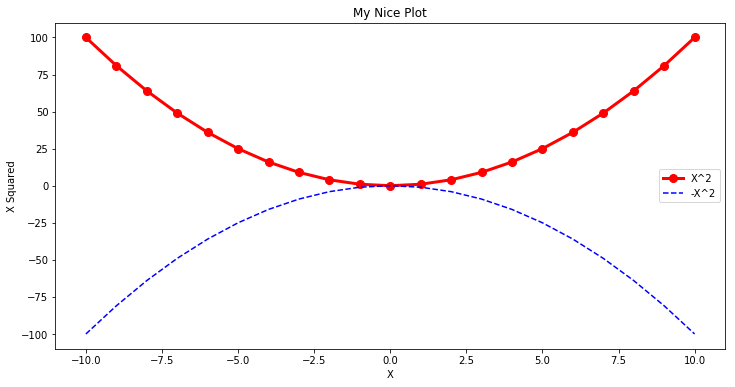

In [123]:
axes.plot(
    x, (x ** 2), color='red', linewidth=3,
    marker='o', markersize=8, label='X^2')

axes.plot(x, -1 * (x ** 2), 'b--', label='-X^2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title("My Nice Plot")

axes.legend()

fig

In [124]:
import numpy as pd

In [125]:
a = np.array([1,2,3])
print(a)

[1 2 3]


In [126]:
# Get Dimension
a.ndim

1

In [127]:
# get shape
a.shape

(3,)

In [128]:
b = np.array([[1.0,2.0,3.0],[3.0,4.0,5.0]])
print(b)

[[1. 2. 3.]
 [3. 4. 5.]]


In [129]:
# Get Dimension
b.ndim

2

In [130]:
# Get Shape
b.shape

(2, 3)

In [131]:
a = np.array([[1,2,3,4,5,6,7],[8,9,10,11,12,13,14]])
print(a)

[[ 1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14]]


In [132]:
# get the specific ellement[r, c]
a[1, 5]

13

In [133]:
# get specific culumb
a[:, 2]

array([ 3, 10])

In [134]:
# get specific row
a[0, :]

array([1, 2, 3, 4, 5, 6, 7])

In [135]:
a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])

# Output:
# [[ 1  2  20  4  5]
# [ 6  7 20  9 10]]


In [136]:
a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])

print(np.full_like(a, 100))


[[100 100 100 100 100]
 [100 100 100 100 100]]


In [137]:
# all 1s matrix
np.ones((4,2,2), dtype='int32')

array([[[1, 1],
        [1, 1]],

       [[1, 1],
        [1, 1]],

       [[1, 1],
        [1, 1]],

       [[1, 1],
        [1, 1]]])

In [138]:
# random decimal numbers
np.random.random_sample(a. shape)

array([[0.89211892, 0.49021174, 0.70873218, 0.18775744, 0.22884501],
       [0.35367815, 0.99907519, 0.44359732, 0.29439062, 0.39708025]])

In [139]:
# the identity matrix
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [140]:
arr = np.array([[1,2,3]])
r1 = np.repeat(arr,3, axis=0)
print(r1)


[[1 2 3]
 [1 2 3]
 [1 2 3]]


In [141]:
import pandas as pd

# Create a dictionary of data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [24, 27, 22, 32, 29],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
    'Score': [85, 88, 90, 92, 95]
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


      Name  Age         City  Score
0    Alice   24     New York     85
1      Bob   27  Los Angeles     88
2  Charlie   22      Chicago     90
3    David   32      Houston     92
4      Eva   29      Phoenix     95


In [142]:
# Select the 'Name' and 'City' columns
print(df[['Name', 'City']])


      Name         City
0    Alice     New York
1      Bob  Los Angeles
2  Charlie      Chicago
3    David      Houston
4      Eva      Phoenix


In [143]:
# Filter rows where Age is greater than 25
print(df[df['Age'] > 25])


    Name  Age         City  Score
1    Bob   27  Los Angeles     88
3  David   32      Houston     92
4    Eva   29      Phoenix     95


In [144]:
# Add a new column 'Passed' based on the 'Score'
df['Passed'] = df['Score'] >= 90
print(df)


      Name  Age         City  Score  Passed
0    Alice   24     New York     85   False
1      Bob   27  Los Angeles     88   False
2  Charlie   22      Chicago     90    True
3    David   32      Houston     92    True
4      Eva   29      Phoenix     95    True


In [145]:
# Calculate the mean age
mean_age = df['Age'].mean()
print(f'Mean Age: {mean_age}')

# Calculate the sum of scores
total_score = df['Score'].sum()
print(f'Total Score: {total_score}')


Mean Age: 26.8
Total Score: 450


In [146]:
# Group by 'City' and calculate the mean 'Score'
grouped = df.groupby('City')['Score'].mean()
print(grouped)

City
Chicago        90
Houston        92
Los Angeles    88
New York       85
Phoenix        95
Name: Score, dtype: int64


In [147]:
import numpy as np

a = np.array([1, 2, 3, 4, 5])
b = a
b[2] = 20
print(a)

[ 1  2 20  4  5]


In [148]:
import numpy as np

a = np.array(([1, 2, 3, 4, 5], [6, 7, 8, 9, 10]))
b = np.max(a, axis=1).sum()
print(b)

15


In [149]:
# Using a list as an array
arr = [1, 2, 3, 4, 5]
print(arr[0])  # Output: 1

# Using numpy arrays
import numpy as np
arr = np.array([1, 2, 3, 4, 5])
print(arr[0])  # Output: 1


1
1


In [150]:
# Two-dimensional array
arr = [[1, 2], [3, 4], [5, 6]]
print(arr[0][1])  # Output: 2


2


In [151]:
a = np.ones((2, 4))
b = a.reshape((4, 2))
print(b)

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [157]:
! pip install pandas openpyxl


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


loading the Data

In [158]:
import pandas as pd

# Load the Excel file
file_path = 'C:\\Users\\lion\\Desktop\\JEOPARDY_CSV.xlsx'  # Update with your file path
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe
df.head()


,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


Data Cleaning

In [159]:
# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
df.dropna(inplace=True)  # Drop rows with any missing values


Show Number      0
Air Date         0
Round            0
Category       152
Value            0
Question         2
Answer          34
dtype: int64


Data Exploration

In [160]:
# Basic statistics
print(df.describe())

# Value counts for categorical columns
print(df['Category'].value_counts().head(10))
print(df['Round'].value_counts())


         Show Number
count  216742.000000
mean     4263.930872
std      1386.465023
min         1.000000
25%      3349.000000
50%      4490.000000
75%      5393.000000
max      6300.000000
BEFORE & AFTER             547
SCIENCE                    518
LITERATURE                 496
AMERICAN HISTORY           418
POTPOURRI                  401
WORLD HISTORY              377
WORD ORIGINS               371
COLLEGES & UNIVERSITIES    351
HISTORY                    349
SPORTS                     342
Name: Category, dtype: int64
Jeopardy!           107293
Double Jeopardy!    105817
Final Jeopardy!       3629
Tiebreaker               3
Name: Round, dtype: int64


Data Visualisation

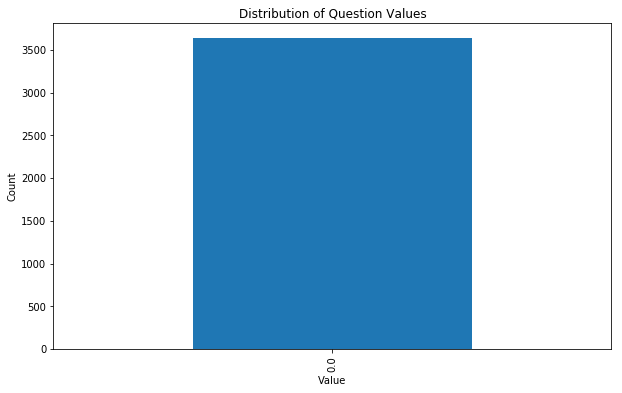

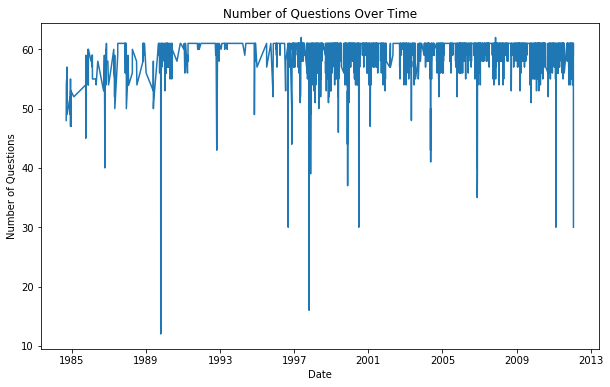

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Update with your actual file path
file_path = 'C:\\Users\\lion\\Desktop\\JEOPARDY_CSV.xlsx'
df = pd.read_excel(file_path)

# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Clean the 'Value' column
# Remove any leading/trailing spaces in 'Value' entries
df['Value'] = df['Value'].str.strip()

# Replace non-numeric values with a default numeric value (0 in this case)
df['Value'].replace(to_replace=r'[^0-9]', value='0', regex=True, inplace=True)

# Convert 'Value' to numeric
df['Value'] = pd.to_numeric(df['Value'])

# Ensure 'Value' is in float format
df['Value'] = df['Value'].astype(float)

# Convert 'Air Date' to datetime
df['Air Date'] = pd.to_datetime(df['Air Date'])

# Extract only the date part from 'Air Date'
df['Air Date'] = df['Air Date'].dt.date

# Distribution of question values
plt.figure(figsize=(10, 6))
df['Value'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Question Values')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

# Plot the number of questions over time
plt.figure(figsize=(10, 6))
df.groupby('Air Date').size().plot()
plt.title('Number of Questions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Questions')
plt.show()


data transforming

In [162]:
# Example: Extract year from a date column
# df['Year'] = df['Date'].dt.year


In [173]:
# Reporting
# Summarize findings in a report or presentation

# Actionable Insights
# Draw conclusions and make recommendations based on the analysis